In [117]:
# Importing important libraries for data performing
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

import plotly.graph_objs as go
import plotly.express as px
plt.style.use('ggplot')

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import lightgbm as lgb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB


from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Dropout

pd.set_option('display.max_columns', None)

In [118]:
# Reding data from the train file
df = pd.read_csv('Train.csv')

In [119]:
# Finding the size of dataset
df.shape

(15000, 55)

In [120]:
# Displaying the column names
df.columns

Index(['INDEX_', 'ACCNUM', 'YEAR', 'DATE', 'TIME', 'STREET1', 'STREET2',
       'OFFSET', 'ROAD_CLASS', 'DISTRICT', 'WARDNUM', 'LATITUDE', 'LONGITUDE',
       'LOCCOORD', 'ACCLOC', 'TRAFFCTL', 'VISIBILITY', 'LIGHT', 'RDSFCOND',
       'ACCLASS', 'IMPACTYPE', 'INVTYPE', 'INVAGE', 'INJURY', 'FATAL_NO',
       'INITDIR', 'VEHTYPE', 'MANOEUVER', 'DRIVACT', 'DRIVCOND', 'PEDTYPE',
       'PEDACT', 'PEDCOND', 'CYCLISTYPE', 'CYCACT', 'CYCCOND', 'PEDESTRIAN',
       'CYCLIST', 'AUTOMOBILE', 'MOTORCYCLE', 'TRUCK', 'TRSN_CITY_VEH',
       'EMERG_VEH', 'PASSENGER', 'SPEEDING', 'AG_DRIV', 'REDLIGHT', 'ALCOHOL',
       'DISABILITY', 'HOOD_158', 'NEIGHBOURHOOD_158', 'HOOD_140',
       'NEIGHBOURHOOD_140', 'DIVISION', 'ObjectId'],
      dtype='object')

In [121]:
# Displaying the first five rows from dataset
df.head()

,INDEX_,ACCNUM,YEAR,DATE,TIME,STREET1,STREET2,OFFSET,ROAD_CLASS,DISTRICT,WARDNUM,LATITUDE,LONGITUDE,LOCCOORD,ACCLOC,TRAFFCTL,VISIBILITY,LIGHT,RDSFCOND,ACCLASS,IMPACTYPE,INVTYPE,INVAGE,INJURY,FATAL_NO,INITDIR,VEHTYPE,MANOEUVER,DRIVACT,DRIVCOND,PEDTYPE,PEDACT,PEDCOND,CYCLISTYPE,CYCACT,CYCCOND,PEDESTRIAN,CYCLIST,AUTOMOBILE,MOTORCYCLE,TRUCK,TRSN_CITY_VEH,EMERG_VEH,PASSENGER,SPEEDING,AG_DRIV,REDLIGHT,ALCOHOL,DISABILITY,HOOD_158,NEIGHBOURHOOD_158,HOOD_140,NEIGHBOURHOOD_140,DIVISION,ObjectId
0,3363207,882024.0,2006,2006/01/07 05:00:00+00,2325,STEELES AVE E,NINTH LINE ST,NaN,Minor Arterial,Scarborough,25,43.842745,-79.22479,Mid-Block,NaN,No Control,Clear,Dark,Wet,Fatal,Approaching,Driver,50 to 54,Fatal,NaN,West,"Automobile, Station Wagon",Going Ahead,Lost control,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,144,Morningside Heights,131,Rouge (131),D42,167
1,3363208,882024.0,2006,2006/01/07 05:00:00+00,2325,STEELES AVE E,NINTH LINE ST,NaN,Minor Arterial,Scarborough,25,43.842745,-79.22479,Mid-Block,NaN,No Control,Clear,Dark,Wet,Fatal,Approaching,Vehicle Owner,unknown,NaN,NaN,NaN,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,144,Morningside Heights,131,Rouge (131),D42,171
2,3363209,882024.0,2006,2006/01/07 05:00:00+00,2325,STEELES AVE E,NINTH LINE ST,NaN,Minor Arterial,Scarborough,25,43.842745,-79.22479,Mid-Block,NaN,No Control,Clear,Dark,Wet,Fatal,Approaching,Driver,35 to 39,Major,NaN,East,"Automobile, Station Wagon",Going Ahead,Driving Properly,Normal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,144,Morningside Heights,131,Rouge (131),D42,173
3,3363414,882174.0,2006,2006/01/09 05:00:00+00,1435,KENNEDY RD,GLAMORGAN AVE,NaN,Major Arterial,Scarborough,21,43.769445,-79.28229,Intersection,At Intersection,Traffic Signal,Clear,Daylight,Dry,Fatal,Pedestrian Collisions,Vehicle Owner,unknown,NaN,NaN,NaN,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,126,Dorset Park,126,Dorset Park (126),D41,309
4,3363415,882174.0,2006,2006/01/09 05:00:00+00,1435,KENNEDY RD,GLAMORGAN AVE,NaN,Major Arterial,Scarborough,21,43.769445,-79.28229,Intersection,At Intersection,Traffic Signal,Clear,Daylight,Dry,Fatal,Pedestrian Collisions,Driver,50 to 54,NaN,NaN,South,"Automobile, Station Wagon",Going Ahead,Driving Properly,Normal,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,126,Dorset Park,126,Dorset Park (126),D41,314


In [122]:
# Finding the column, datatype and non-null count of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 55 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   INDEX_             15000 non-null  int64  
 1   ACCNUM             11302 non-null  float64
 2   YEAR               15000 non-null  int64  
 3   DATE               15000 non-null  object 
 4   TIME               15000 non-null  int64  
 5   STREET1            15000 non-null  object 
 6   STREET2            13657 non-null  object 
 7   OFFSET             1928 non-null   object 
 8   ROAD_CLASS         14643 non-null  object 
 9   DISTRICT           14986 non-null  object 
 10  WARDNUM            15000 non-null  int64  
 11  LATITUDE           15000 non-null  float64
 12  LONGITUDE          15000 non-null  float64
 13  LOCCOORD           14910 non-null  object 
 14  ACCLOC             9550 non-null   object 
 15  TRAFFCTL           14971 non-null  object 
 16  VISIBILITY         149

In [123]:
# Finding statistical values in dataset
df.describe()

,INDEX_,ACCNUM,YEAR,TIME,WARDNUM,LATITUDE,LONGITUDE,FATAL_NO,ObjectId
count,1.500000e+04,1.130200e+04,15000.000000,15000.000000,1.500000e+04,15000.000000,15000.000000,593.000000,15000.000000
mean,2.897643e+07,3.193720e+08,2011.397200,1347.332800,2.862441e+03,43.710768,-79.396827,28.777403,7500.500000
std,3.465401e+07,1.067084e+09,3.685531,631.600998,1.982925e+05,0.056158,0.104224,17.749125,4330.271354
min,3.363207e+06,1.284070e+05,2006.000000,0.000000,1.000000e+00,43.592047,-79.638390,1.000000,1.000000
25%,5.293513e+06,1.005723e+06,2008.000000,908.000000,7.000000e+00,43.662649,-79.470042,14.000000,3750.750000
50%,6.714110e+06,1.158316e+06,2011.000000,1438.000000,1.300000e+01,43.702807,-79.397632,28.000000,7500.500000
75%,8.024356e+07,1.308396e+06,2014.000000,1840.000000,2.200000e+01,43.756457,-79.319190,42.000000,11250.250000
max,8.154201e+07,4.008024e+09,2018.000000,2359.000000,1.716222e+07,43.855445,-79.125896,78.000000,15000.000000


In [124]:
# Dispalying unique values
df.nunique()

INDEX_               15000
ACCNUM                3822
YEAR                    13
DATE                  3082
TIME                  1276
STREET1               1547
STREET2               2344
OFFSET                 339
ROAD_CLASS               9
DISTRICT                 4
WARDNUM                 71
LATITUDE              3475
LONGITUDE             3901
LOCCOORD                 7
ACCLOC                   9
TRAFFCTL                10
VISIBILITY               8
LIGHT                    9
RDSFCOND                 9
ACCLASS                  2
IMPACTYPE               10
INVTYPE                 18
INVAGE                  21
INJURY                   4
FATAL_NO                78
INITDIR                  5
VEHTYPE                 27
MANOEUVER               16
DRIVACT                 13
DRIVCOND                10
PEDTYPE                 16
PEDACT                  15
PEDCOND                 10
CYCLISTYPE              22
CYCACT                  11
CYCCOND                 10
PEDESTRIAN               1
C

## Exploratory Data Analysis

In [125]:
# Function to map time values to segments of the day
def map_time_to_segment(time):
    if time < 600:
        return 'Midnight'
    elif time < 1200:
        return 'Morning'
    elif time < 1700:
        return 'Afternoon'
    elif time < 2100:
        return 'Evening'
    else:
        return 'Night'

# Applying the function to create a new column 'time_segment'
df['TIME_SEGMENT'] = df['TIME'].apply(map_time_to_segment)

In [126]:
# Group by road conditions and count the frequency of each
road_condition_counts = df['RDSFCOND'].value_counts().reset_index()
road_condition_counts.columns = ['Road Condition', 'Frequency']

# Create a bar plot using Plotly
fig = px.bar(road_condition_counts, x='Road Condition', y='Frequency',
             title='Frequency of Road Conditions in Traffic Collisions',
             labels={'Frequency': 'Collision Count', 'Road Condition': 'Road Condition'})

# Show the plot
fig.show()

In [127]:
# Group by state and road conditions, and count the frequency of each
state_road_condition_counts = df.groupby(['DISTRICT', 'RDSFCOND']).size().reset_index(name='Frequency')

# Create a bar plot using Plotly
fig = px.bar(state_road_condition_counts, x='DISTRICT', y='Frequency', color='RDSFCOND',
             title='Frequency of Road Conditions by State',
             labels={'Frequency': 'Collision Count', 'DISTRICT': 'State', 'RDSFCOND': 'Road Condition'},
             barmode='group')

# Show the plot
fig.show()

In [128]:
condition_counts = df.groupby(['RDSFCOND', 'VISIBILITY']).size().reset_index(name='Frequency')

# Create a bar plot using Plotly
fig = px.bar(condition_counts, x='RDSFCOND', y='Frequency', color='VISIBILITY',
             title='Frequency of Collisions by Road Conditions and Visibility',
             labels={'Frequency': 'Collision Count', 'RDSFCOND': 'Road Condition', 'VISIBILITY': 'Visibility'},
             barmode='group')

# Show the plot

fig.show()

In [129]:
yearly_collision_counts = df['YEAR'].value_counts().reset_index()
yearly_collision_counts.columns = ['Year', 'Collision Count']

# Sort the DataFrame by year
yearly_collision_counts = yearly_collision_counts.sort_values(by='Year')

# Create a bar plot using Plotly
fig = px.bar(yearly_collision_counts, x='Year', y='Collision Count',
              title='Year-wise Occurrence of Collisions',
              labels={'Collision Count': 'Collision Count', 'Year': 'Year'})

# Set x-axis configuration to show every year
fig.update_layout(xaxis=dict(tickmode='linear', dtick=1))

# Show the plot
fig.show()

In [130]:
# Group by year and state and count the occurrences of collisions
state_yearly_collision_counts = df.groupby(['DISTRICT', 'YEAR']).size().reset_index(name='Collision Count')

# Sort the DataFrame by year
state_yearly_collision_counts = state_yearly_collision_counts.sort_values(by=['DISTRICT', 'YEAR'])

# Create a grouped bar plot using Plotly
fig = px.bar(state_yearly_collision_counts, x='YEAR', y='Collision Count', color='DISTRICT',
             title='Year-wise Occurrence of Collisions by State',
             labels={'Collision Count': 'Collision Count', 'YEAR': 'Year', 'DISTRICT': 'State'},
             barmode='group')

# Show the plot
fig.show()

In [131]:
# Group by light and visibility conditions and count the occurrences of collisions
light_visibility_counts = df.groupby(['LIGHT', 'VISIBILITY']).size().reset_index(name='Collision Count')

# Create a grouped bar plot using Plotly
fig = px.bar(light_visibility_counts, x='LIGHT', y='Collision Count', color='VISIBILITY',
             title='Comparison of Light and Visibility Conditions in Collisions',
             labels={'Collision Count': 'Collision Count', 'LIGHT': 'Light Condition', 'VISIBILITY': 'Visibility Condition'},
             barmode='group')

# Show the plot
fig.show()

In [132]:
# Group by light and visibility conditions and count the occurrences of collisions
light_visibility_counts = df.groupby(['LIGHT', 'VISIBILITY']).size().reset_index(name='Collision Count')

# Create a grouped bar plot using Plotly
fig = px.bar(light_visibility_counts, x='LIGHT', y='Collision Count', color='VISIBILITY',
             title='Comparison of Light and Visibility Conditions in Collisions',
             labels={'Collision Count': 'Collision Count', 'LIGHT': 'Light Condition', 'VISIBILITY': 'Visibility Condition'},
             barmode='group')

# Show the plot
fig.show()

In [133]:
import folium
from folium import plugins

m = folium.Map(height=500,location=[37.09024,-95.712891], zoom_start=4)

# convert to (n, 2) nd-array format for heatmap
stationArr = df[['LATITUDE','LONGITUDE']]

# plot heatmap
m.add_child(plugins.HeatMap(stationArr, radius=15))
m

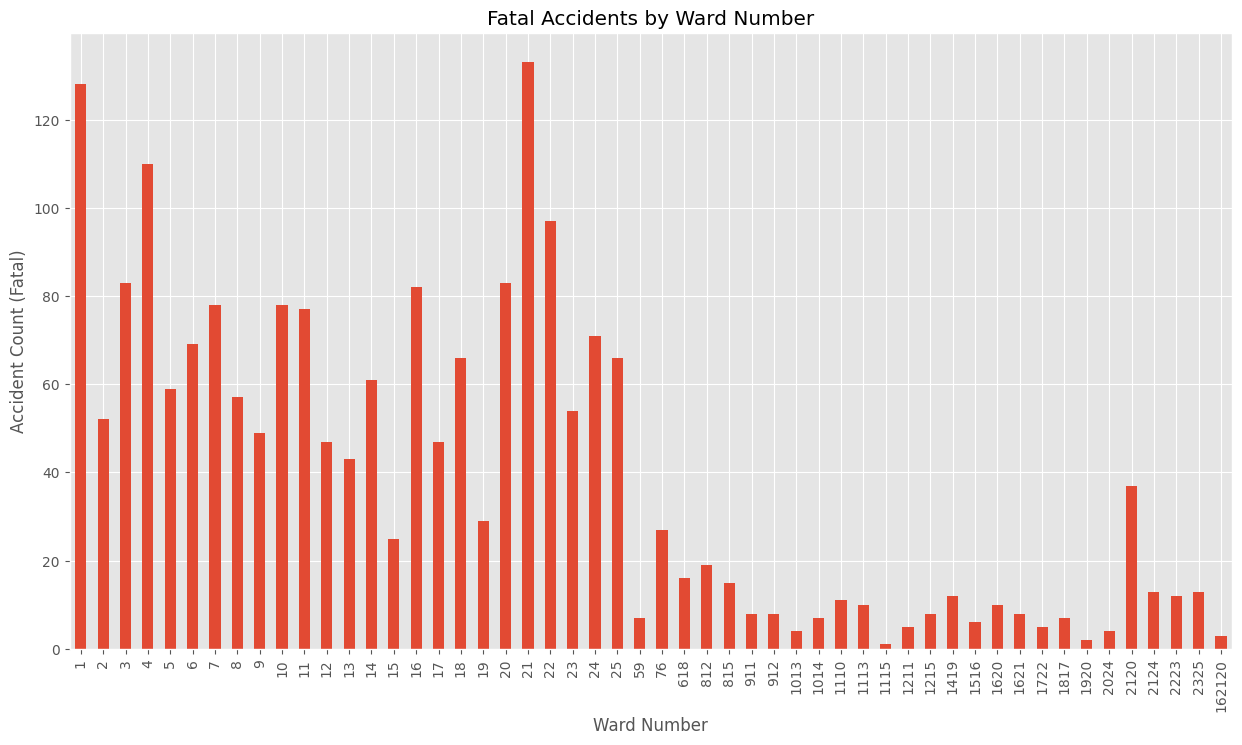

In [134]:
# Filtering data to include only accidents classified as 'Fatal'
fatal_accidents = df[df['ACCLASS'] == 'Fatal']

# Grouping the filtered data by 'WARDNUM' and count the number of accidents in each group
wardnum_counts = fatal_accidents.groupby('WARDNUM').size()

# Specify the figure size
plt.figure(figsize=(15, 8))

# Create the bar plot
wardnum_counts.plot.bar(xlabel='Ward Number', ylabel='Accident Count (Fatal)',
                        title='Fatal Accidents by Ward Number')

# Show the plot
# plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

In [135]:
# Filter out rows with null age values and get unique age groups
valid_age_groups = df.dropna(subset=['INVAGE'])['INVAGE'].unique()

# Group by age group and count the occurrences of collisions
age_collision_counts = df['INVAGE'].value_counts().reset_index()
age_collision_counts.columns = ['Age Group', 'Collision Count']

# Filter only the rows with valid age groups
age_collision_counts = age_collision_counts[age_collision_counts['Age Group'].isin(valid_age_groups)]

# Create a bar plot using Plotly
fig = px.bar(age_collision_counts, x='Age Group', y='Collision Count',
             title='Collision Occurrences by Age Group',
             labels={'Collision Count': 'Collision Count', 'Age Group': 'Age Group'})

# Show the plot
fig.show()

In [88]:
# Group by injury type and count the occurrences of collisions
injury_collision_counts = df['INJURY'].value_counts().reset_index()
injury_collision_counts.columns = ['Injury Type', 'Collision Count']

# Create a bar plot using Plotly
fig = px.bar(injury_collision_counts, x='Injury Type', y='Collision Count',
             title='Collision Occurrences by Injury Type',
             labels={'Collision Count': 'Collision Count', 'Injury Type': 'Injury Type'})

# Show the plot
fig.show()

In [89]:
# Group by driver condition and count the occurrences of collisions
drivcond_collision_counts = df['DRIVCOND'].value_counts().reset_index()
drivcond_collision_counts.columns = ['Driver Condition', 'Collision Count']

# Create a bar plot using Plotly
fig = px.bar(drivcond_collision_counts, x='Driver Condition', y='Collision Count',
             title='Collision Occurrences by Driver Condition',
             labels={'Collision Count': 'Collision Count', 'Driver Condition': 'Driver Condition'})

# Show the plot
fig.show()

In [90]:
# Filter out rows with missing vehicle type
df_filtered = df.dropna(subset=['VEHTYPE'])

# Group by vehicle type and count the occurrences
collision_counts = df_filtered['VEHTYPE'].value_counts().reset_index()
collision_counts.columns = ['Vehicle Type', 'Collision Count']

# Create a bar chart using Plotly Express
fig = px.bar(collision_counts, x='Vehicle Type', y='Collision Count',
             title='Total Collision Comparison by Vehicle Type',
             labels={'Vehicle Type': 'Vehicle Type', 'Collision Count': 'Collision Count'})

# Show the plot
fig.show()

In [91]:
# Filter out rows with missing pedestrian condition
df_filtered = df.dropna(subset=['PEDCOND'])

# Group by pedestrian condition and count the occurrences
collision_counts = df_filtered['PEDCOND'].value_counts().reset_index()
collision_counts.columns = ['Pedestrian Condition', 'Collision Count']

# Create a bar chart using Plotly Express
fig = px.bar(collision_counts, x='Pedestrian Condition', y='Collision Count',
             title='Total Collision Comparison by Pedestrian Condition',
             labels={'Pedestrian Condition': 'Pedestrian Condition', 'Collision Count': 'Collision Count'})

# Show the plot
fig.show()

In [92]:
# Count the occurrences of each factor
counts = {
    'Cyclist Involved': df['CYCLIST'].notnull().sum(),
    'Pedestrian Involved': df['PEDESTRIAN'].notnull().sum(),
    'Transit or City Vehicle Involved': df['TRSN_CITY_VEH'].notnull().sum(),
    'Passenger Involved': df['PASSENGER'].notnull().sum(),
    'Speeding Related': df['SPEEDING'].notnull().sum(),
    'Red Light Related': df['REDLIGHT'].notnull().sum(),
    'Alcohol Related': df['ALCOHOL'].notnull().sum(),
}

# Create a DataFrame from the counts
data = pd.DataFrame.from_dict(counts, orient='index', columns=['Count']).reset_index()

# Rename columns
data.columns = ['Factor', 'Count']

# Create a bar chart using Plotly Express
fig = px.bar(data, x='Factor', y='Count',
             title='Total Accidents and Involvement of Different Factors',
             labels={'Factor': 'Factor', 'Count': 'Count'})

# Show the plot
fig.show()

In [93]:
# Count the occurrences of each factor
counts = {
    'Cyclist Involved': df['CYCLIST'].notnull().sum(),
    'Pedestrian Involved': df['PEDESTRIAN'].notnull().sum(),
    'Transit or City Vehicle Involved': df['TRSN_CITY_VEH'].notnull().sum(),
    'Passenger Involved': df['PASSENGER'].notnull().sum(),
    'Speeding Related': df['SPEEDING'].notnull().sum(),
    'Red Light Related': df['REDLIGHT'].notnull().sum(),
    'Alcohol Related': df['ALCOHOL'].notnull().sum(),
}

# Create a DataFrame from the counts
data = pd.DataFrame.from_dict(counts, orient='index', columns=['Count']).reset_index()

# Rename columns
data.columns = ['Factor', 'Count']

# Create a pie chart using Plotly Express
fig = px.pie(data, names='Factor', values='Count',
             title='Distribution of Accidents by Factor')

# Show the plot
fig.show()

In [94]:
# Group by involvement type and count the occurrences
collision_counts = df_filtered['INVTYPE'].value_counts().reset_index()
collision_counts.columns = ['Involvement Type', 'Collision Count']

# Create a bar chart using Plotly Express
fig = px.bar(collision_counts, x='Involvement Type', y='Collision Count',
             title='Total Collisions by Involvement Type',
             labels={'Involvement Type': 'Involvement Type', 'Collision Count': 'Collision Count'})

# Show the plot
fig.show()

In [95]:
# Defining a function to map dates to seasons
def get_season(date):
    month = date.month
    if 3 <= month <= 5:
        return 'Spring'
    elif 6 <= month <= 8:
        return 'Summer'
    elif 9 <= month <= 11:
        return 'Autumn'
    else:
        return 'Winter'

# Converting the 'DATE' column to datetime format if it's not already
df['DATE'] = pd.to_datetime(df['DATE'])

# Applying the function to create a new column for seasons
df['SEASON'] = df['DATE'].apply(get_season)

# Filtering out rows with missing season information
df_filtered = df.dropna(subset=['SEASON'])

# Groupping by season and count the occurrences
season_counts = df_filtered['SEASON'].value_counts().reset_index()
season_counts.columns = ['Season', 'Accident Count']

# Creating a bar chart using Plotly Express
fig = px.bar(season_counts, x='Season', y='Accident Count',
             title='Accidents by Season',
             labels={'Season': 'Season', 'Accident Count': 'Number of Accidents'})

# Showing the plot
fig.show()

In [96]:
# Filtering out rows with missing season and district information
df_filtered = df.dropna(subset=['SEASON', 'DISTRICT'])

# Groupping by season and district and count the occurrences
season_district_counts = df_filtered.groupby(['DISTRICT', 'SEASON']).size().reset_index(name='Accident Count')

# Creating a grouped bar chart using Plotly Express
fig = px.bar(season_district_counts, x='DISTRICT', y='Accident Count', color='SEASON',
             title='Accidents by District and Season',
             labels={'DISTRICT': 'District', 'Accident Count': 'Number of Accidents'})

# Showing the plot
fig.show()

In [97]:
# Countting the number of accidents for each street
street_accidents = df['STREET1'].value_counts().reset_index()
street_accidents.columns = ['Street', 'Accident_Count']

# Sorting streets based on the number of accidents in descending order
street_accidents_sorted = street_accidents.sort_values(by='Accident_Count', ascending=False)

# Selecting the top 10 streets with the highest number of accidents
top_10_streets = street_accidents_sorted.head(10)

# Creating a bar plot to visualize the top 10 streets
fig = go.Figure([go.Bar(x=top_10_streets['Street'], y=top_10_streets['Accident_Count'])])

fig.update_layout(title='Top 10 Streets with Most Accidents',
                  xaxis_title='Street',
                  yaxis_title='Number of Accidents')

fig.show()


In [98]:
# Group by time segment to get the counts of accidents
time_segment_counts = df['TIME_SEGMENT'].value_counts().reset_index()

# Rename columns for clarity
time_segment_counts.columns = ['Time Segment', 'Accident Count']

# Plot the distribution of accidents across different time segments using Plotly
fig = px.bar(time_segment_counts, x='Time Segment', y='Accident Count',
             title='Distribution of Accidents Across Time Segments')

# Show the plot
fig.show()

In [99]:
# Reding data from the train file
df = pd.read_csv('Train.csv')

In [100]:
# converting column names to lowercase
df.columns = map(str.lower, df.columns)

In [101]:
# Checking numbers of rows and columns
df.shape

(15000, 55)

In [102]:
# Checking 10 different records from  the whole dataset
df.sample(10)

,index_,accnum,year,date,time,street1,street2,offset,road_class,district,wardnum,latitude,longitude,loccoord,accloc,traffctl,visibility,light,rdsfcond,acclass,impactype,invtype,invage,injury,fatal_no,initdir,vehtype,manoeuver,drivact,drivcond,pedtype,pedact,pedcond,cyclistype,cycact,cyccond,pedestrian,cyclist,automobile,motorcycle,truck,trsn_city_veh,emerg_veh,passenger,speeding,ag_driv,redlight,alcohol,disability,hood_158,neighbourhood_158,hood_140,neighbourhood_140,division,objectid
11521,80167139,4.002478e+09,2014,2014/07/11 04:00:00+00,1918,VICTORIA PARK AVE,GLENCREST BLVD,NaN,Major Arterial,Toronto and East York,1920,43.708121,-79.295680,Intersection,At Intersection,No Control,Clear,Daylight,Dry,Non-Fatal Injury,Cyclist Collisions,Cyclist,60 to 64,Major,NaN,South,Bicycle,Turning Left,NaN,NaN,NaN,NaN,NaN,Cyclist turned left across motorists path.,Improper Turn,Inattentive,NaN,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,120,Clairlea-Birchmount,120,Clairlea-Birchmount (120),D41,10451
5934,5231776,1.101048e+06,2009,2009/04/10 04:00:00+00,1808,PHARMACY AVE,ELLESMERE RD,NaN,Major Arterial,Scarborough,21,43.759045,-79.310190,Intersection,NaN,No Control,Clear,Daylight,Dry,Non-Fatal Injury,SMV Other,Other Property Owner,unknown,NaN,NaN,NaN,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN,119,Wexford/Maryvale,119,Wexford/Maryvale (119),D41,4772
6464,5300761,1.131365e+06,2009,2009/10/18 04:00:00+00,306,ADELAIDE ST E,VICTORIA ST,NaN,Major Arterial,Toronto and East York,13,43.650645,-79.377290,Intersection,NaN,Traffic Signal,Clear,Dark,Dry,Non-Fatal Injury,Pedestrian Collisions,Pedestrian,25 to 29,Major,NaN,NaN,Other,Other,NaN,NaN,Unknown,Other,Normal,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,168,Downtown Yonge East,75,Church-Yonge Corridor (75),D51,5718
1174,7846799,1.368270e+06,2013,2013/07/28 04:00:00+00,1,SHEPPARD AVE E,DON MILLS RD,NaN,Major Arterial,North York,17,43.774943,-79.347888,Mid-Block,NaN,No Control,Rain,"Dark, artificial",Wet,Fatal,Pedestrian Collisions,Driver,40 to 44,NaN,NaN,East,Passenger Van,Changing Lanes,Driving Properly,Normal,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN,Yes,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN,47,Don Valley Village,47,Don Valley Village (47),D33,9407
1618,80497619,NaN,2016,2016/01/03 05:00:00+00,1915,1400 KENNEDY RD,NaN,196 m North of,Major Arterial,Scarborough,21,43.764498,-79.280681,Mid-Block,Non Intersection,No Control,Clear,"Dark, artificial",Dry,Fatal,Pedestrian Collisions,Passenger,5 to 9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN,Yes,NaN,NaN,NaN,NaN,Yes,NaN,Yes,NaN,NaN,NaN,126,Dorset Park,126,Dorset Park (126),D41,12485
6560,5305046,1.134906e+06,2009,2009/10/14 04:00:00+00,1047,JARVIS ST,ISABELLA ST,NaN,Major Arterial,Toronto and East York,13,43.668845,-79.379490,Intersection,At Intersection,Traffic Signal,Clear,Daylight,Dry,Non-Fatal Injury,Turning Movement,Driver,40 to 44,NaN,NaN,South,"Automobile, Station Wagon",Turning Left,Improper Turn,Inattentive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,167,Church-Wellesley,75,Church-Yonge Corridor (75),D51,5561
8612,6702104,1.265520e+06,2011,2011/11/22 05:00:00+00,2057,STONG CRT,JANE ST,NaN,Collector,Etobicoke York,7,43.762045,-79.518090,Mid-Block,NaN,No Control,Rain,"Dark, artificial",Wet,Non-Fatal Injury,SMV Other,Driver,70 to 74,Major,NaN,East,"Automobile, Station Wagon",Unknown,Other,Medical or Physical Disability,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,24,Black Creek,24,Black Creek (24),D31,7785
9439,7445236,1.306980e+06,2012,2012/06/23 04:00:00+00,1315,SHEPPARD AVE W,JANE ST,NaN,Major Arterial,Etobicoke York,76,43.739545,-79.512490,Mid-Block,At Intersection,No Control,Clear,Daylight,Dry,Non-Fatal Injury,Pedestrian Collisions,Driver,65 to 69,NaN,NaN,West,"Automobile, Station Wagon",Changing Lanes,Lost control,Other,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25,Gl

#### Disaplaying the total number of values of  missing an unique values in every feature

In [103]:
# Saving the results of null values in variable and then into dataframe as Missing Values
null_counts = df.isnull().sum()
null_df = pd.DataFrame(null_counts, columns=["Missing Values"])

# Saving the results of inique values in variable and then into dataframe as Uinique Values
unique_values = df.nunique().reset_index()
unique_values.columns = ["Feature", "Unique Values"]

# Merging both the DataFrames in one dataframe
combined_df = pd.merge(unique_values, null_df, left_on="Feature", right_index=True)

combined_df

,Feature,Unique Values,Missing Values
0,index_,15000,0
1,accnum,3822,3698
2,year,13,0
3,date,3082,0
4,time,1276,0
5,street1,1547,0
6,street2,2344,1343
7,offset,339,13072
8,road_class,9,357
9,district,4,14


In [104]:
# acclass is our target variable,, therefor checking the class balance of those records is important

In [105]:
df.acclass.value_counts()

acclass
Non-Fatal Injury    12978
Fatal                2022
Name: count, dtype: int64

### As it is seen here that we have a huge class imbalance in acclass, this  may lead to create bias results and also impact the accuracy for the  Fatal class.

####  For handling this imbalance of class here we are checking the minimum number of null values in all records (rows) where `acclass` is `Non-Fatal Injury`, and then starting from there we will check that what is that number from the columns where there are reasonable amount of null values and the number of features having that number of null vaues, and we will drop those records.

In [106]:
# Finding records with multiple null values in rows where 'acclass' is 'Non-Fatal Injury' and null count > 10
multiple_nulls = (df['acclass'] == 'Non-Fatal Injury') & (df.isnull().sum(axis=1) > 10)
records_with_multiple_nulls = df[multiple_nulls]

records_with_multiple_nulls.shape

(12978, 55)

In [107]:
# Finding records with multiple null values in rows where 'acclass' is 'Non-Fatal Injury' and null count > 11
multiple_nulls = (df['acclass'] == 'Non-Fatal Injury') & (df.isnull().sum(axis=1) > 13)
records_with_multiple_nulls = df[multiple_nulls]

records_with_multiple_nulls.shape

(12978, 55)

In [108]:
# Finding records with multiple null values in rows where 'acclass' is 'Non-Fatal Injury' and null count > 15
multiple_nulls = (df['acclass'] == 'Non-Fatal Injury') & (df.isnull().sum(axis=1) > 15)
records_with_multiple_nulls = df[multiple_nulls]

records_with_multiple_nulls.shape

(12959, 55)

In [109]:
# Finding records with multiple null values in rows where 'acclass' is 'Non-Fatal Injury' and null count > 19
multiple_nulls = (df['acclass'] == 'Non-Fatal Injury') & (df.isnull().sum(axis=1) > 19)
records_with_multiple_nulls = df[multiple_nulls]

records_with_multiple_nulls.shape

(8132, 55)

In [110]:
# Finding records with multiple null values in rows where 'acclass' is 'Non-Fatal Injury' and null count > 20
multiple_nulls = (df['acclass'] == 'Non-Fatal Injury') & (df.isnull().sum(axis=1) > 20)
records_with_multiple_nulls = df[multiple_nulls]

records_with_multiple_nulls.shape

(5440, 55)

### #Dropping 54450 records where number of null values is 20 and the acclass is Non-Fatal Injury is a reasonable number, therefore we can drop those records.

In [111]:
df = df.drop(records_with_multiple_nulls.index)

In [112]:
# Checking the balance of values in acclass again
df.acclass.value_counts()

acclass
Non-Fatal Injury    7538
Fatal               2022
Name: count, dtype: int64

In [113]:
# Checking the shape of whole dataset
df.shape

(9560, 55)

### Checking the numbers of unique values and missing values after dropping the rows which contains total  20 null values.

In [114]:
# Saving the results of null values in variable and then into dataframe as Missing Values
null_counts = df.isnull().sum()
null_df = pd.DataFrame(null_counts, columns=["Missing Values"])

# Saving the results of inique values in variable and then into dataframe as Uinique Values
unique_values = df.nunique().reset_index()
unique_values.columns = ["Feature", "Unique Values"]

# Merging both the DataFrames in one dataframe
combined_df = pd.merge(unique_values, null_df, left_on="Feature", right_index=True)

combined_df

,Feature,Unique Values,Missing Values
0,index_,9560,0
1,accnum,3393,2603
2,year,13,0
3,date,2892,0
4,time,1244,0
5,street1,1265,0
6,street2,2219,505
7,offset,332,8131
8,road_class,9,171
9,district,4,5


### For further processing accnum feature is important, because it represents each accident with a unique number and it has null values, therefore we have to create our own acc_num column.

#### These are the steps of engineering a new feature out of accnum

- Step 1: Is to check the numbers of duplicated values with the condition 'year','date,'time' and 'street1', if records are  having the same of these values it means there they are of one accnum and we will assign those records a unique number starting from 1 to the matching criteria.
- Step 2: There will be some records which may not match the condition we provided, we determine that those records are not having any other person or party involved with them in accident, therefore we will assign them unique number starting after the max number of acc_num column till the max null values of the column

In [249]:
# Storing the value of duplicated values
one_accident = df[df.duplicated(subset=['year','date','time','street1'], keep=False)]

# grouping those records according to the condition provided
one_accident['acc_num'] = one_accident.groupby(['year','date','time','street1']).ngroup()

# Merging the newly created features with original df
df = pd.merge(df, one_accident[['acc_num']], left_index=True, right_index=True, how='left')

#Checking the max value of acc_num
null_of_accnum = int(df['acc_num'].max())

# Storing the index of values of isnull for imputing them
null_values_indices = df[df['acc_num'].isnull()].index
sequence = range(null_of_accnum, null_of_accnum + len(null_values_indices))

# Imputing the record with null values from the given
df.loc[null_values_indices, 'acc_num'] = sequence
df["acc_num"].isna().sum()

<ipython-input-249-84034234caa7>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



0

### The other feature engineering to do is to dividing the time into time_segments

In [250]:
# Function to map time values to segments of the day
def map_time_to_segment(time):
    if time < 600:
        return 'Midnight'
    elif time < 1200:
        return 'Morning'
    elif time < 1700:
        return 'Afternoon'
    elif time < 2100:
        return 'Evening'
    else:
        return 'Night'

# Applying the function to create a new column 'time_segment'
df['time_segment'] = df['time'].apply(map_time_to_segment)


In [251]:
# Initializing the labelencoder to label encode the values for applying them on algorithms and
label_encoder  = LabelEncoder()

### For further processing the imputation is divided into  3 parts

- 1: The the columns which if filled with most occured values or any other values may lead to create biasness in the results are fille with 'NA', 'unknown' and 'None'.

- 2: Columns which are having less numbers of null values and if imputed with most occured values may not create bias results are filled with the most occured values of that columns.

- 3: Columns which are having null values and are important to keep but cannnot be imputed with most occured or NA are label enoded so that their null values will be automatically assigned to a particular number and will get imputed.

- 4: The final one is that we are dropping those columns which are having large number of null values and if imputed by both the ways may still lead to bias results, those columns are dropped in this step.

In [252]:
# Columns which are filled with 'NA', 'Unknown', ''
df['street2'].fillna('NA',inplace=True)
df['district'].fillna('unknown', inplace=True)
df['loccoord'].fillna('unknown', inplace=True)
df['injury'].fillna('None', inplace=True)

# Columns which can be imputed with most occured values
df['road_class'].fillna('Major Arterial', inplace=True)
df['traffctl'].fillna('No Control', inplace=True)
df['visibility'].fillna('Clear', inplace=True)
df['rdsfcond'].fillna('Dry', inplace=True)


columns = [
    'invage', 'vehtype', 'manoeuver', 'drivact', 'drivcond', 'pedtype', 'pedcond', 'cyclistype',
    'acclass', 'cyccond', 'street1', 'street2', 'road_class', 'loccoord', 'traffctl', 'visibility',
    'district', 'light', 'rdsfcond', 'impactype', 'injury', 'division', 'pedestrian', 'cyclist',
    'automobile', 'motorcycle', 'trsn_city_veh', 'emerg_veh', 'passenger', 'speeding', 'ag_driv',
    'redlight', 'alcohol', 'truck', 'cycact', 'pedact', 'fatal_no', 'accloc', 'invtype', 'hood_158',
    'hood_140', 'time_segment','disability'
]
for column in columns:
    df[column] =  label_encoder.fit_transform(df[column])


#  Dropping the columns which are not important
# df.drop('index_',axis=1, inplace=True)
# df.drop('time', axis=1, inplace=True)
# df.drop('accnum',axis=1, inplace=True)
# df.drop('offset', axis=1, inplace=True)
# df.drop('year', axis=1, inplace=True)
# df.drop('date', axis=1, inplace=True)
# df.drop('initdir', axis=1, inplace=True)
# df.drop('longitude', axis=1,inplace=True)
# df.drop('latitude', axis=1,inplace=True)
# df.drop(columns=['neighbourhood_140','neighbourhood_158'], axis=1, inplace=True)

dft.drop(columns=['index_','time','accnum','offset','year','date','initdir','longitude','latitude','neighbourhood_140','neighbourhood_158'], axis=1, inplace=True)



In [253]:
df

,street1,street2,road_class,district,wardnum,loccoord,accloc,traffctl,visibility,light,rdsfcond,acclass,impactype,invtype,invage,injury,fatal_no,vehtype,manoeuver,drivact,drivcond,pedtype,pedact,pedcond,cyclistype,cycact,cyccond,pedestrian,cyclist,automobile,motorcycle,truck,trsn_city_veh,emerg_veh,passenger,speeding,ag_driv,redlight,alcohol,hood_158,hood_140,division,objectid,acc_num,time_segment
0,1138,1421,6,2,25,4,9,0,0,0,7,0,1,1,10,0,78,0,2,8,9,16,15,10,22,11,10,1,1,0,1,1,1,1,1,1,1,1,1,43,36,10,167,4.0,4
1,1138,1421,6,2,25,4,9,0,0,0,7,0,1,12,20,4,78,11,16,13,10,16,15,10,22,11,10,1,1,0,1,1,1,1,1,1,1,1,1,43,36,10,171,4.0,4
2,1138,1421,6,2,25,4,9,0,0,0,7,0,1,1,6,1,78,0,2,1,7,16,15,10,22,11,10,1,1,0,1,1,1,1,1,1,1,1,1,43,36,10,173,4.0,4
3,764,832,5,2,21,3,0,8,0,4,0,0,4,12,20,4,78,11,16,13,10,16,15,10,22,11,10,0,1,0,1,1,1,1,1,1,1,1,1,28,30,9,309,7.0,0
4,764,832,5,2,21,3,0,8,0,4,0,0,4,1,10,4,78,0,2,1,7,16,15,10,22,11,10,0,1,0,1,1,1,1,1,1,1,1,1,28,30,9,314,7.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14989,741,46,5,0,1,3,0,8,0,7,0,1,9,1,3,1,78,0,2,1,7,16,15,10,22,11,10,1,1,0,1,1,1,1,0,1,0,1,1,88,63,5,14990,3451.0,1
14990,406,297,5,2,23,3,0,8,0,4,0,1,2,0,5,1,78,1,13,13,10,16,15,10,10,2,5,1,0,0,1,1,1,1,1,1,1,1,1,30,33,10,14991,4671.0,1
14991,577,1132,5,0,2,4,4,0,0,4,0,1,1,1,11,1,78,13,2,1,7,16,15,10,22,11,10,1,1,0,1,1,1,1,1,0,0,1,1,1,107,4,14992,3416.0,0
14992,577,1132,5,0,2,4,4,0,0,4,0,1,1,1,12,3,78,0,2,1,7,16,15,10,22,11,10,1,1,0,1,1,1,1,1,0,0,1,1,1,107,4,14993,3416.0,0


# # Train test split for TRAIN Data

In [254]:
x = df.drop(columns=['acclass'])
y = df['acclass']

# Training the 80% of the data and 20% is for testing
x_train, x_test, y_train,  y_test = train_test_split(x, y, test_size=0.20)

### Checking the accuracy of these model and other cassification models combined at once.

In [255]:
# Importing those models which are used in the functions
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

# Storing the models into list
classifiers = [
    KNeighborsClassifier(2),
    SVC(kernel="rbf", C=0.025, probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    xgb.XGBClassifier()
]

# Using for loop for applying each model on x_test and y_test
for classifier in classifiers:
    classifier.fit(x_train, y_train)
    print(classifier)
    print("Model score: %.3f" % classifier.score(x_test, y_test))

KNeighborsClassifier(n_neighbors=2)
Model score: 0.883
SVC(C=0.025, probability=True)
Model score: 0.794
DecisionTreeClassifier()
Model score: 0.881
RandomForestClassifier()
Model score: 0.931
AdaBoostClassifier()
Model score: 0.909
GradientBoostingClassifier()
Model score: 0.921
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_paral

In [256]:
#Creating the method for prepare the confusion matrix of results of models
def prepare_heatmap(matrix):
    sns.heatmap(matrix, annot=True,  fmt='d')

    # Adding labels to the axes
    plt.xlabel('Predicted values', fontsize=12)
    plt.ylabel('Actual values', fontsize=12)

    # Replacing numerical labels with categorical labels in the tick labels
    # Corresponding to [0, 1]
    tick_labels = ['Fatal', 'Non-fatal injury']
    plt.xticks(ticks=[0.5, 1.5], labels=tick_labels, fontsize=10)
    plt.yticks(ticks=[0.5, 1.5], labels=tick_labels, fontsize=10)
    plt.show

# #GaussianNB

Accuracy in Gaussian Naive Bayes: 0.6171548117154811
Classification report of Gaussian Naive Bayes: 
               precision    recall  f1-score   support

           0       0.32      0.79      0.46       394
           1       0.91      0.57      0.70      1518

    accuracy                           0.62      1912
   macro avg       0.62      0.68      0.58      1912
weighted avg       0.79      0.62      0.65      1912



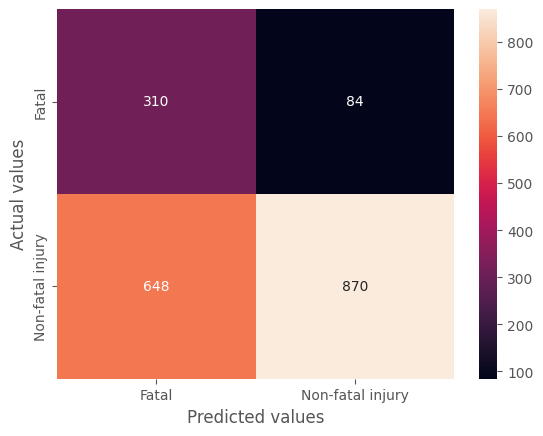

In [257]:
# Intializing the model
model_gnb = GaussianNB()

# Fit model on the data
model_gnb.fit(x_train, y_train)

# Making prediction on the test data
pred_gnb = model_gnb.predict(x_test)

print("Accuracy in Gaussian Naive Bayes:", accuracy_score(y_test, pred_gnb))
print('Classification report of Gaussian Naive Bayes: \n', classification_report(y_test, pred_gnb))

# Displaying the confusion matrix of the results
gnb_matrix = confusion_matrix(y_test, pred_gnb)

# Calling method for confusion matrix
prepare_heatmap(gnb_matrix)

# Logistic Regression

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Accuracy with Logistic Regression: 0.8645397489539749
Classification report of model with Logistic Regression: 
               precision    recall  f1-score   support

           0       0.81      0.45      0.58       394
           1       0.87      0.97      0.92      1518

    accuracy                           0.86      1912
   macro avg       0.84      0.71      0.75      1912
weighted avg       0.86      0.86      0.85      1912



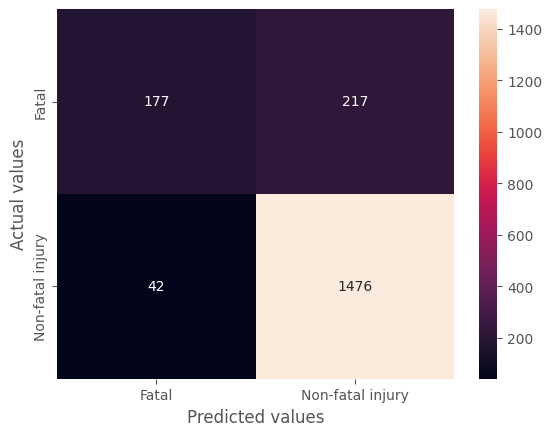

In [258]:
model_lgr = LogisticRegression()

model_lgr.fit(x_train, y_train)

pred_lgr = model_lgr.predict(x_test)

print("Accuracy with Logistic Regression:", accuracy_score(y_test, pred_lgr))
print("Classification report of model with Logistic Regression: \n", classification_report(y_test, pred_lgr))

# Displaying the confusion matrix of the results
lgr_matrix = confusion_matrix(y_test, pred_lgr)

# Calling method for confusion matrix
prepare_heatmap(lgr_matrix)

# #KNN

Accuracy in knn with 1 neighbor: 0.9675732217573222
Classification report of model with knn: 

               precision    recall  f1-score   support

           0       0.90      0.94      0.92       394
           1       0.98      0.97      0.98      1518

    accuracy                           0.97      1912
   macro avg       0.94      0.96      0.95      1912
weighted avg       0.97      0.97      0.97      1912

Accuracy in knn with 5 neighbor: 0.823744769874477
Classification report of model with Logistic Regression: 
               precision    recall  f1-score   support

           0       0.59      0.48      0.53       394
           1       0.87      0.91      0.89      1518

    accuracy                           0.82      1912
   macro avg       0.73      0.70      0.71      1912
weighted avg       0.81      0.82      0.82      1912



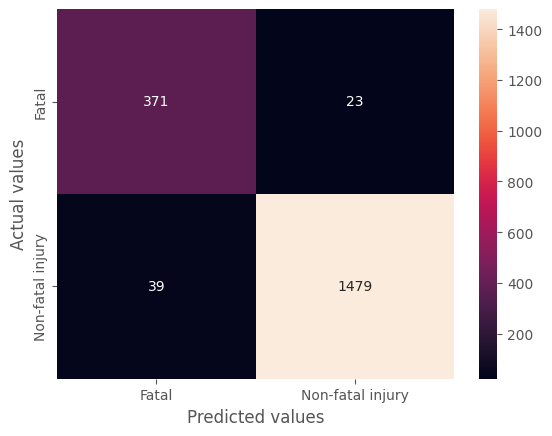

In [259]:
# Initializing the knn with 1 neighbors
model_knn1 = KNeighborsClassifier(n_neighbors=1)

# Initializing the knn with 5 neighbors
model_knn5 = KNeighborsClassifier(n_neighbors=5)

# Fitting the model on data
model_knn1.fit(x_train, y_train)
model_knn5.fit(x_train, y_train)

# Testing the model on test set
pred_knn1 = model_knn1.predict(x_test)
pred_knn5 = model_knn5.predict(x_test)

print("Accuracy in knn with 1 neighbor:", accuracy_score(y_test, pred_knn1))
print("Classification report of model with knn: \n\n", classification_report(y_test, pred_knn1))
print("Accuracy in knn with 5 neighbor:", accuracy_score(y_test, pred_knn5))
print("Classification report of model with Logistic Regression: \n", classification_report(y_test, pred_knn5))



# Displaying the confusion matrix of the results
knn1_matrix = confusion_matrix(y_test, pred_knn1)

# Calling method for confusion matrix
prepare_heatmap(knn1_matrix)


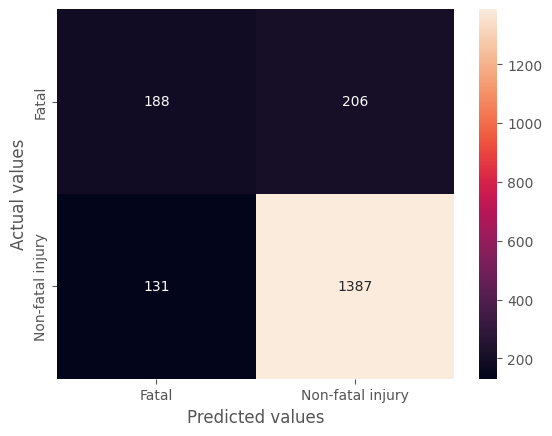

In [260]:
# Displaying the confusion matrix of the results
knn5_matrix = confusion_matrix(y_test, pred_knn5)

# Calling method for confusion matrix
prepare_heatmap(knn5_matrix)

In [261]:
#Creating pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [262]:
steps = [("standard_scaler", StandardScaler()),
         ('classifier', DecisionTreeClassifier()),
        ]

pipe = Pipeline(steps)
pipe

Pipeline(steps=[('standard_scaler', StandardScaler()),
                ('classifier', DecisionTreeClassifier())])

# #Decision tree

In [263]:
pipe.fit(x_train, y_train)

# Making predictions
y_pred = pipe.predict(x_test)
y_pred


print("Accuracy decision tree:", accuracy_score(y_test, y_pred))
print("Classificatino report of Decision Tree: \n", classification_report(y_test, y_pred))

# Calculating AUC score
auc_score_tree = roc_auc_score(y_test, y_pred)

# Printing AUC score
print("AUC:", auc_score_tree)

Accuracy decision tree: 0.8875523012552301
Classificatino report of Decision Tree: 
               precision    recall  f1-score   support

           0       0.71      0.77      0.74       394
           1       0.94      0.92      0.93      1518

    accuracy                           0.89      1912
   macro avg       0.82      0.84      0.83      1912
weighted avg       0.89      0.89      0.89      1912

AUC: 0.8436745517412036


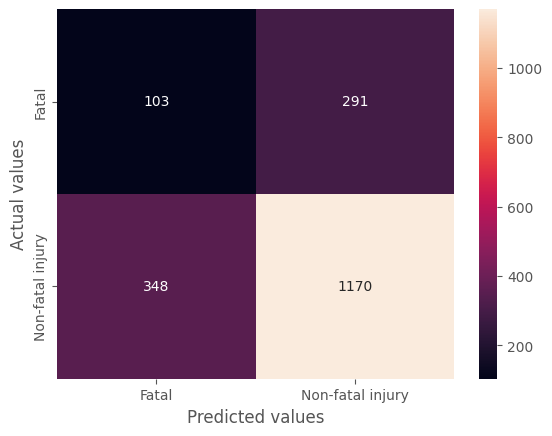

In [264]:
# Displaying the confusion matrix of the results
dtree_matrix = confusion_matrix(y_test, pred_tree)

# Calling method for confusion matrix
prepare_heatmap(dtree_matrix)

# #XGBoost

Accuracy XGBoost: 0.9408995815899581
Classification report of XGBoost: 
               precision    recall  f1-score   support

           0       0.93      0.77      0.84       394
           1       0.94      0.99      0.96      1518

    accuracy                           0.94      1912
   macro avg       0.94      0.88      0.90      1912
weighted avg       0.94      0.94      0.94      1912

AUC: 0.8772713896858677


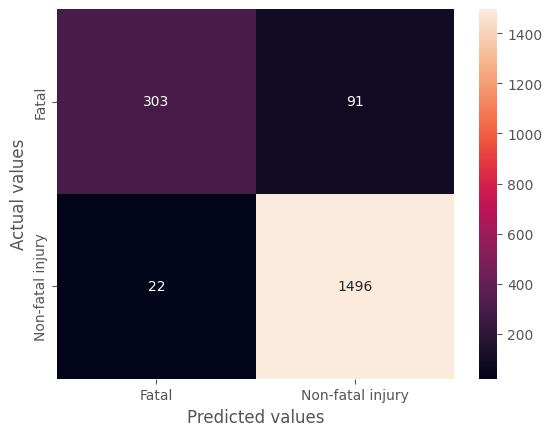

In [265]:
# Initializing the xgb model
model_xgb = xgb.XGBClassifier()

# Fitting the model
model_xgb.fit(x_train,y_train)

# Making prediction on test data
pred_xgb = model_xgb.predict(x_test)

# Checking the accuracy
print("Accuracy XGBoost:", accuracy_score(y_test, pred_xgb))
print("Classification report of XGBoost: \n", classification_report(y_test, pred_xgb))

# Adding labels to the axes
plt.xlabel('Predicted values', fontsize=12)
plt.ylabel('Actual values', fontsize=12)
pred_xgb = model_xgb.predict(x_test)

# Calculate AUC score
auc_score_xgb = roc_auc_score(y_test, pred_xgb)

# Printing AUC score
print("AUC:", auc_score_xgb)

# Displaying the confusion matrix of the results
xgb_matrix = confusion_matrix(y_test, pred_xgb)

# Calling method for confusion matrix
prepare_heatmap(xgb_matrix)

# GridSearchCV

Accuracy XGBoost: 0.9419456066945606
Classification report of XGBoost: 
               precision    recall  f1-score   support

           0       0.96      0.75      0.84       394
           1       0.94      0.99      0.96      1518

    accuracy                           0.94      1912
   macro avg       0.95      0.87      0.90      1912
weighted avg       0.94      0.94      0.94      1912

AUC: 0.8713525678323737


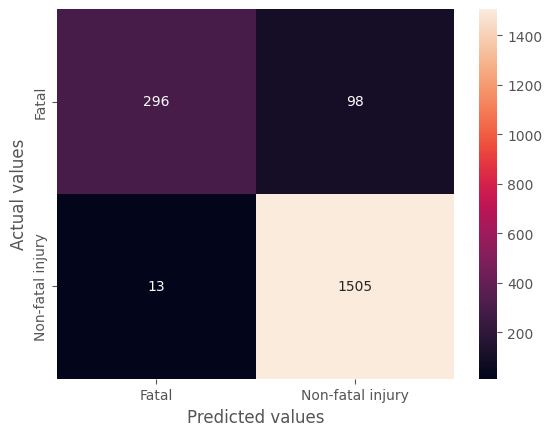

In [266]:
# Define the XGBoost classifier
model_xgb = xgb.XGBClassifier()

# Defining the parameter grid for GridSearchCV
param_grid = {
    'max_depth': [3, 4, 5],  # Depth of trees
    'learning_rate': [0.1, 0.01, 0.001],  # Learning rate
    'n_estimators': [100, 200, 300],  # Number of boosting rounds
    'gamma': [0, 0.1, 0.2]  # Minimum loss reduction required to make a further partition on a leaf node
}

# Performing GridSearchCV
grid_search = GridSearchCV(estimator=model_xgb, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)

# Getting the best parameters from the grid search
best_params = grid_search.best_params_

# Using the best parameters to create a new XGBoost model
best_model_xgb = xgb.XGBClassifier(**best_params)

# Fitting the model on the training data
best_model_xgb.fit(x_train, y_train)

# Making predictions on the test data
pred_xgb = best_model_xgb.predict(x_test)

# Printing accuracy and classification report
print("Accuracy XGBoost:", accuracy_score(y_test, pred_xgb))
print("Classification report of XGBoost: \n", classification_report(y_test, pred_xgb))

# Calculatting and print AUC score
auc_score_xgb = roc_auc_score(y_test, pred_xgb)
print("AUC:", auc_score_xgb)

# Plotting confusion matrix
GScvxgb_matrix = confusion_matrix(y_test, pred_xgb)

# Calling method for confusion matrix
prepare_heatmap(GScvxgb_matrix)

# #ANN

60/60 [==============================] - 0s 1ms/step
Epoch 1/20
96/96 [==============================] - 1s 5ms/step - loss: 88.5865 - accuracy: 0.6602 - val_loss: 17.6845 - val_accuracy: 0.7915
Epoch 2/20
96/96 [==============================] - 0s 3ms/step - loss: 38.3928 - accuracy: 0.6755 - val_loss: 13.8177 - val_accuracy: 0.6614
Epoch 3/20
96/96 [==============================] - 0s 3ms/step - loss: 24.4195 - accuracy: 0.6808 - val_loss: 10.6554 - val_accuracy: 0.7869
Epoch 4/20
96/96 [==============================] - 0s 3ms/step - loss: 18.6496 - accuracy: 0.6656 - val_loss: 7.1184 - val_accuracy: 0.7837
Epoch 5/20
96/96 [==============================] - 0s 3ms/step - loss: 12.6928 - accuracy: 0.6757 - val_loss: 5.1333 - val_accuracy: 0.7085
Epoch 6/20
96/96 [==============================] - 0s 3ms/step - loss: 8.1045 - accuracy: 0.6801 - val_loss: 2.1784 - val_accuracy: 0.7569
Epoch 7/20
96/96 [==============================] - 0s 4ms/step - loss: 48.3227 - accuracy: 0.6862 

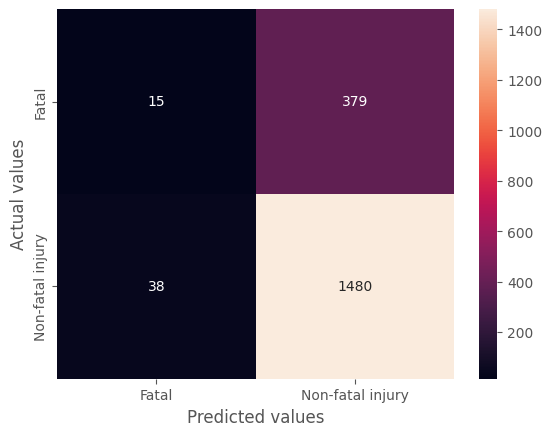

In [267]:
# Defining the model architecture with additional layers and regularization
model_ann = Sequential([
    Dense(64, activation='relu', input_shape=(x_train.shape[1],)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Making predictions on the test data
predictions = model_ann.predict(x_test)

# Converting probabilities to binary predictions
pred_ann = (predictions > 0.5).astype(int)

# Compiling the model with Adam optimizer and custom learning rate
optimizer = Adam(learning_rate=0.001)
model_ann.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Training the model with increased number of epochs
history = model_ann.fit(x_train, y_train, epochs=20, batch_size=64, validation_split=0.2)

# Evaluating the model
accuracy_ann = model_ann.evaluate(x_test, y_test)[1]
print("Accuracy ANN:", accuracy_ann)

# Classification report
print("Classification report of ANN: \n", classification_report(y_test, pred_ann))

# Confusion matrix
ann_matrix = confusion_matrix(y_test, pred_ann)

# Calling method for confusion matrix
prepare_heatmap(ann_matrix)

In [268]:
# Reading the test file
dft = pd.read_csv('Test.csv')

In [269]:
# Converting the columns names of test data into lowercase
dft.columns = map(str.lower, dft.columns)

# Applying cleaning on test data

In [270]:
# Displaying the dft
dft.sample(10)

,index_,accnum,year,date,time,street1,street2,offset,road_class,district,wardnum,latitude,longitude,loccoord,accloc,traffctl,visibility,light,rdsfcond,impactype,invtype,invage,injury,fatal_no,initdir,vehtype,manoeuver,drivact,drivcond,pedtype,pedact,pedcond,cyclistype,cycact,cyccond,pedestrian,cyclist,automobile,motorcycle,truck,trsn_city_veh,emerg_veh,passenger,speeding,ag_driv,redlight,alcohol,disability,hood_158,neighbourhood_158,hood_140,neighbourhood_140,division,objectid
2729,81665821,2.001844e+09,2022,2022/09/22 04:00:00+00,850,TRETHEWEY DR AND PAULSON ROAD,PAULSON RD,10 m West of,Minor Arterial,NaN,5.0,43.693583,-79.482257,Intersection,Intersection Related,No Control,Clear,Daylight,Dry,Pedestrian Collisions,Driver,65 to 69,NaN,NaN,West,"Automobile, Station Wagon",Going Ahead,Driving Properly,Normal,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,112,Beechborough-Greenbrook,112,Beechborough-Greenbrook (112),D12,17730
2635,81665286,2.001790e+09,2022,2022/09/14 04:00:00+00,1436,KING ST E,CHURCH ST,52 m West of,Major Arterial,Toronto and East York,NaN,43.649707,-79.374957,Mid-Block,Non Intersection,No Control,Clear,Daylight,Dry,Cyclist Collisions,Cyclist,40 to 44,NaN,NaN,West,Bicycle,Turning Left,NaN,NaN,NaN,NaN,NaN,Cyclist turned left across motorists path.,Improper Turn,Normal,NaN,Yes,NaN,Yes,NaN,NaN,NaN,NaN,Yes,Yes,NaN,NaN,NaN,168,Downtown Yonge East,75,Church-Yonge Corridor (75),D51,17636
2320,81581482,1.001686e+09,2021,2021/09/03 04:00:00+00,1735,COLLEGE ST,UNIVERSITY AVE,NaN,Major Arterial,Toronto and East York,NaN,43.659785,-79.390453,Intersection,At Intersection,Traffic Signal,Clear,Daylight,Dry,Turning Movement,Driver,30 to 34,Minimal,NaN,West,Police Vehicle,Turning Left,Improper Turn,Inattentive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN,NaN,Yes,NaN,NaN,Yes,Yes,NaN,NaN,170,Yonge-Bay Corridor,76,Bay Street Corridor (76),D52,17321
832,81331613,NaN,2019,2019/08/23 04:00:00+00,752,DAVENPORT RD,BATHURST ST,NaN,Minor Arterial,Toronto and East York,12.0,43.676657,-79.415744,Intersection,At Intersection,Traffic Signal,Clear,Daylight,Dry,Rear End,Driver,25 to 29,Minimal,NaN,West,Municipal Transit Bus (TTC),Stopped,Driving Properly,Normal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Yes,NaN,Yes,NaN,Yes,NaN,NaN,NaN,96,Casa Loma,96,Casa Loma (96),D13,15833
745,81473894,NaN,2019,2019/02/08 05:00:00+00,330,COLLEGE ST,BAY ST,NaN,Major Arterial,Toronto and East York,1113.0,43.660742,-79.385814,Intersection,At Intersection,Traffic Signal,Clear,"Dark, artificial",Dry,Approaching,Passenger,60 to 64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,Yes,Yes,NaN,Yes,NaN,NaN,Yes,170,Yonge-Bay Corridor,76,Bay Street Corridor (76),D52,15746
3002,81667857,2.001898e+09,2022,2022/09/29 04:00:00+00,1920,SKYWAY AVE,DIXON RD,NaN,Minor Arterial,North York,NaN,43.686701,-79.586040,Mid-Block,Non Intersection,No Control,NaN,Daylight,NaN,Turning Movement,Motorcycle Driver,50 to 54,Fatal,44.0,South,Motorcycle,Going Ahead,Driving Properly,Normal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,West Humber-Clairville,1,West Humber-Clairville (1),D23,18003
11,80972086,NaN,2018,2018/09/26 04:00:00+00,2053,3850 SHEPPARD AVE E,NaN,90 m East of ALLANFORD RD,Major Arterial,Scarborough,22.0,43.782229,-79.292499,Mid-Block,Non Intersection,No Control,Clear,"Dark, artificial",Dry,Pedestrian Collisions,Driver,unknown,NaN,NaN,East,"Automobile, Station Wagon",Going Ahead,Failed to Yield Right of Way,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,118,Tam O'Shanter-Sullivan,118,Tam O'Shanter-Sullivan (118),D42,15012
2935,81688316,2.001894e+09,2022,2022/09/29 04:00:00+00,904,STEELES AVE W,FENMAR DR,NaN,Major Arterial,Etobicoke York,NaN,43.766474,-79.564739,Intersection,At Intersection,Traffic Signal,Clear,Daylight,Dry,Pedestrian Collisions,Passenger,65 to 69,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN,Yes,NaN,NaN,NaN,NaN,Yes,NaN,Yes,

In [271]:
# Storing the value of duplicated values
one_accident = dft[dft.duplicated(subset=['year','date','time','street1'], keep=False)]

# grouping those records according to the condition provided
one_accident['acc_num'] = one_accident.groupby(['year','date','time','street1']).ngroup()

# Merging the newly created features with original df
dft = pd.merge(dft, one_accident[['acc_num']], left_index=True, right_index=True, how='left')


# Checking the max value of acc_num
null_of_accnum = int(dft['acc_num'].max())

# Storing the index of values of isnull for imputing them
null_values_indices = dft[dft['acc_num'].isnull()].index
sequence = range(null_of_accnum, null_of_accnum + len(null_values_indices))

# Imputing the record with null values from the given
dft.loc[null_values_indices, 'acc_num'] = sequence
dft["acc_num"].isna().sum()


<ipython-input-271-e47f6f269221>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



0

In [272]:
# Function to map time values to segments of the day
def map_time_to_segment(time):
    if time < 600:
        return 'Midnight'
    elif time < 1200:
        return 'Morning'
    elif time < 1700:
        return 'Afternoon'
    elif time < 2100:
        return 'Evening'
    else:
        return 'Night'

# Applying the function to create a new column 'time_segment'
dft['time_segment'] = dft['time'].apply(map_time_to_segment)


In [273]:
# Columns which are filled with 'NA', 'Unknown', ''
dft['street2'].fillna('NA',inplace=True)
dft['district'].fillna('unknown', inplace=True)
dft['loccoord'].fillna('unknown', inplace=True)
dft['injury'].fillna('None', inplace=True)

# Columns which can be imputed with most occured values
dft['road_class'].fillna('Major Arterial', inplace=True)
dft['traffctl'].fillna('No Control', inplace=True)
dft['visibility'].fillna('Clear', inplace=True)
dft['rdsfcond'].fillna('Dry', inplace=True)

columns = [
    'invage', 'vehtype', 'manoeuver', 'drivact', 'drivcond', 'pedtype', 'pedcond', 'cyclistype',
     'cyccond', 'street1', 'street2', 'road_class', 'loccoord', 'traffctl', 'visibility',
    'district', 'light', 'rdsfcond', 'impactype', 'injury', 'division', 'pedestrian', 'cyclist',
    'automobile', 'motorcycle', 'trsn_city_veh', 'emerg_veh', 'passenger', 'speeding', 'ag_driv',
    'redlight', 'alcohol', 'truck', 'cycact', 'pedact', 'fatal_no', 'accloc', 'invtype', 'hood_158',
    'hood_140', 'time_segment','disability'
]
for column in columns:
    dft[column] =  label_encoder.fit_transform(dft[column])


# #  Dropping the columns which are not important
# dft.drop('index_',axis=1, inplace=True)
# dft.drop('time', axis=1, inplace=True)
# dft.drop('accnum',axis=1, inplace=True)
# dft.drop('offset', axis=1, inplace=True)
# dft.drop('year', axis=1, inplace=True)
# dft.drop('date', axis=1, inplace=True)
# dft.drop('initdir', axis=1, inplace=True)
# dft.drop('longitude', axis=1,inplace=True)
# dft.drop('latitude', axis=1,inplace=True)
# dft.drop(columns=['neighbourhood_140','neighbourhood_158'], axis=1, inplace=True)

dft.drop(columns=['index_','time','accnum','offset','year','date','initdir','longitude','latitude','neighbourhood_140','neighbourhood_158'], axis=1, inplace=True)


In [274]:
dft

,street1,street2,road_class,district,wardnum,loccoord,accloc,traffctl,visibility,light,rdsfcond,impactype,invtype,invage,injury,fatal_no,vehtype,manoeuver,drivact,drivcond,pedtype,pedact,pedcond,cyclistype,cycact,cyccond,pedestrian,cyclist,automobile,motorcycle,truck,trsn_city_veh,emerg_veh,passenger,speeding,ag_driv,redlight,alcohol,hood_158,hood_140,division,objectid,acc_num,time_segment
0,327,543,5,4,10.0,0,0,4,0,0,0,2,0,8,1,66,2,1,12,10,15,14,10,0,3,3,1,0,0,1,1,1,1,1,1,1,1,1,65,112,3,15001,333.0,1
1,327,543,5,4,10.0,0,0,4,0,0,0,2,2,5,4,66,1,1,1,7,15,14,10,19,10,6,1,0,0,1,1,1,1,1,1,1,1,1,65,112,3,15002,333.0,1
2,278,437,2,4,10.0,1,4,0,0,4,0,4,2,4,4,66,1,1,1,7,15,14,10,19,10,6,0,1,0,1,1,1,1,1,1,1,1,1,67,112,12,15003,154.0,1
3,348,704,7,0,9.0,1,1,0,0,4,0,4,2,4,4,66,1,1,8,5,15,14,10,19,10,6,0,1,0,1,1,1,1,1,1,1,1,1,72,130,0,15004,334.0,1
4,348,704,7,0,9.0,1,1,0,0,4,0,4,10,4,1,66,29,15,12,10,15,6,7,19,10,6,0,1,0,1,1,1,1,1,1,1,1,1,72,130,0,15005,334.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3189,286,728,4,5,NaN,0,0,2,0,0,7,4,10,9,2,66,29,15,12,10,11,2,7,19,10,6,0,1,0,1,1,1,1,1,1,0,1,1,7,8,2,18190,1188.0,1
3190,286,728,4,5,NaN,0,0,2,0,0,7,4,10,0,3,66,29,15,12,10,11,2,7,19,10,6,0,1,0,1,1,1,1,1,1,0,1,1,7,8,2,18191,1188.0,1
3191,286,728,4,5,NaN,0,0,2,0,0,7,4,10,0,2,66,29,15,12,10,11,2,7,19,10,6,0,1,0,1,1,1,1,1,1,0,1,1,7,8,2,18192,1188.0,1
3192,183,478,5,4,NaN,1,4,0,5,1,7,4,2,6,4,66,1,1,1,7,15,14,10,19,10,6,0,1,0,1,1,1,1,1,1,1,1,1,136,116,3,18193,1189.0,4


In [275]:
# splitting data for training and testing model on test data
x = df.drop('acclass', axis=1)
y = df['acclass']

# Decision Tree on Test

In [276]:
# Initializing the model
model_dtree  = DecisionTreeClassifier()

# Fitting the model on train data
model_dtree.fit(x, y)

# Making perdiction on test data
dtree_pred = model_dtree.predict(dft)

# Assigning the result values to actual with for making submission on kaggle
class_mapping_dtree = {0: 'Fatal', 1: 'Non-Fatal Injury'}
pred_labels_dtree = [class_mapping_dtree[dtree_pred] for dtree_pred in dtree_pred]

# Creating a DataFrame for predictions and save it to a CSV file
output_df = pd.DataFrame({'ObjectId': range(15001, 15001 + len(pred_labels_dtree)), 'ACCLASS': pred_labels_dtree})
output_df.to_csv('predictions_final_dtree.csv', index=False)

ValueError: Input X contains NaN.
DecisionTreeClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

# XGB with Test

In [ ]:
# Initializing the model
model_xgbt  = xgb.XGBClassifier(objective="binary:logistic")

# Fitting the model on train data
model_xgbt.fit(x, y)

# Making perdiction on x_test
xgb_pred = model_xgbt.predict(dft)

# Assigning the result values to actual with for making submission on kaggle
class_mapping_xgb = {0: 'Fatal', 1: 'Non-Fatal Injury'}
pred_labels_xgb = [class_mapping_xgb[xgb_pred] for xgb_pred in xgb_pred]

# Creating a DataFrame for predictions and save it to a CSV file
output_df = pd.DataFrame({'ObjectId': range(15001, 15001 + len(pred_labels_xgb)), 'ACCLASS': pred_labels_xgb})
output_df.to_csv('predictions_final_xgb.csv', index=False)

# GridsearchCV with Test

In [ ]:
# Defining the XGBoost classifier
model_xgb = xgb.XGBClassifier(objective="binary:logistic")

# Defining the parameter grid for GridSearchCV
param_grid = {
    'max_depth': [3, 4, 5],  # Depth of trees
    'learning_rate': [0.1, 0.01, 0.001],  # Learning rate
    'n_estimators': [100, 200, 300],  # Number of boosting rounds
    'gamma': [0, 0.1, 0.2]  # Minimum loss reduction required to make a further partition on a leaf node
}

# Performing GridSearchCV
grid_search = GridSearchCV(estimator=model_xgb, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(x, y)

# Gettiing the best parameters from the grid search
best_params = grid_search.best_params_

# Using the best parameters to create a new XGBoost model
best_model_xgb = xgb.XGBClassifier(objective="binary:logistic", **best_params)

# Fitting the model on the entire data
best_model_xgb.fit(x, y)

# Making predictions on the test data
xgb_pred = best_model_xgb.predict(dft)

# Mapping predictions to labels
class_mapping_xgb = {0: 'Fatal', 1: 'Non-Fatal Injury'}
pred_labels_xgb = [class_mapping_xgb[xgb_pred] for xgb_pred in xgb_pred]

# Creating a DataFrame for predictions and save it to a CSV file
output_df = pd.DataFrame({'ObjectId': range(15001, 15001 + len(pred_labels_xgb)), 'ACCLASS': pred_labels_xgb})
output_df.to_csv('predictions_Grid_XGB_final', index=False)

In [ ]:
# Initializing the model
model_knn1 = KNeighborsClassifier(n_neighbors=1)

# Fitting the model on train data
model_knn1.fit(x, y)


# Making perdiction on x_test
pred_knn1 = model_knn1.predict(dft)

# Assigning the result values to actual with for making submission on kaggle
class_mapping_knn1 = {0: 'Fatal', 1: 'Non-Fatal Injury'}
pred_labels_knn1 = [class_mapping_knn1[pred_knn1] for pred_knn1 in pred_knn1]

# Creating a DataFrame for predictions and save it to a CSV file
output_df = pd.DataFrame({'ObjectId': range(15001, 15001 + len(pred_labels_knn1)), 'ACCLASS': pred_labels_knn1})
output_df.to_csv('predictions_final_knn.csv', index=False)